In [1]:
import util as u
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

keras = tf.keras



Loaded util


In [2]:
xs,ys = u.get_dataset()
X_train  = xs[:30]
Y_train = ys[:30]; Y_train = Y_train.reshape(30,4)
X_val = xs[30:39]
Y_val = ys[30:39]; Y_val = Y_val.reshape(9,4)

#set params
batch_size=2
num_epochs=100
model_name="v0_" + str(num_epochs) + "e_b" + str(batch_size)

In [3]:

with tf.device('/cpu:0'):
    base_model = VGG16(weights='imagenet', input_shape = (512,512,3), include_top = False)
    #Extracting features from end of 5th block of layers in VGG16, size is  (None, 32, 32, 512)
    pre_model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

    X_train = preprocess_input(X_train)
    vgg_16_5_features = pre_model.predict(X_train) #shape of feature tensor is (30, 32, 32, 512)


In [4]:
vgg_16_5_val_features = pre_model.predict(X_val)

In [5]:
#create model
model = Sequential()
#add model layers

#pool
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32, 32, 512)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(10, kernel_size=6))
model.add(Activation('relu'))
model.add(Conv2D(10, kernel_size=6))
model.add(Activation('relu'))

#pool 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(4, activation = None))


#model.add(Dense(4, activation = "sigmoid", kernel_initializer=keras.initializers.RandomNormal(mean=0,stddev=0.05)))

# https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

In [6]:
#compile model using accuracy to measure model performance
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999), loss='mean_squared_error')

In [7]:
#model.summary()

In [8]:
h = model.fit(vgg_16_5_features, Y_train, validation_data=(vgg_16_5_val_features, Y_val), batch_size=batch_size, epochs=num_epochs)

Train on 30 samples, validate on 9 samples
Epoch 1/100
30/30 [==============================] - 2s 82ms/sample - loss: 17106.1469 - val_loss: 7834.7759
Epoch 2/100
30/30 [==============================] - 0s 7ms/sample - loss: 7138.8347 - val_loss: 5002.9368
Epoch 3/100
30/30 [==============================] - 0s 7ms/sample - loss: 3138.8889 - val_loss: 4026.7280
Epoch 4/100
30/30 [==============================] - 0s 6ms/sample - loss: 1801.0541 - val_loss: 5021.7388
Epoch 5/100
30/30 [==============================] - 0s 7ms/sample - loss: 1254.2411 - val_loss: 4031.9153
Epoch 6/100
30/30 [==============================] - 0s 8ms/sample - loss: 1227.5229 - val_loss: 4577.6529
Epoch 7/100
30/30 [==============================] - 0s 7ms/sample - loss: 1073.8750 - val_loss: 4578.1935
Epoch 8/100
30/30 [==============================] - 0s 7ms/sample - loss: 556.4160 - val_loss: 2975.3479
Epoch 9/100
30/30 [==============================] - 0s 7ms/sample - loss: 322.1420 - val_loss: 2908

30/30 [==============================] - 0s 8ms/sample - loss: 18.1818 - val_loss: 2534.7027
Epoch 78/100
30/30 [==============================] - 0s 12ms/sample - loss: 17.0247 - val_loss: 2456.3963
Epoch 79/100
30/30 [==============================] - 0s 12ms/sample - loss: 21.6104 - val_loss: 2599.4866
Epoch 80/100
30/30 [==============================] - 0s 11ms/sample - loss: 28.9348 - val_loss: 2467.6744
Epoch 81/100
30/30 [==============================] - 0s 9ms/sample - loss: 54.4447 - val_loss: 2564.0095
Epoch 82/100
30/30 [==============================] - 0s 7ms/sample - loss: 112.3286 - val_loss: 2580.9174
Epoch 83/100
30/30 [==============================] - 0s 11ms/sample - loss: 203.4243 - val_loss: 2568.6841
Epoch 84/100
30/30 [==============================] - 0s 8ms/sample - loss: 645.3273 - val_loss: 3707.1714
Epoch 85/100
30/30 [==============================] - 0s 7ms/sample - loss: 1744.5932 - val_loss: 2265.9879
Epoch 86/100
30/30 [==============================

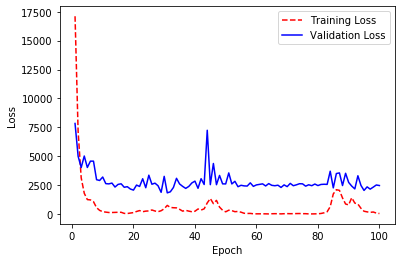

In [9]:
train_loss = h.history['loss']
test_loss  = h.history['val_loss']
epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


In [10]:
#plt.savefig("models/" + model_name + ".png")

In [11]:
def get_results(x,y) : 
    pred = model.predict(x)
    return (pred, y, y-pred , np.mean( (y-pred)**2) ) 
    

In [12]:
y_train_p, y_train, train_diff , train_loss = get_results(vgg_16_5_features,Y_train)

In [13]:
y_test_p, y_test, test_diff , test_loss = get_results(vgg_16_5_val_features,Y_val)

In [14]:
y_train_p

array([[192.024   , 113.74994 , 225.48187 , 132.04405 ],
       [129.86351 , 352.37134 , 151.54355 , 370.69388 ],
       [161.39818 ,  69.01326 , 195.00664 ,  90.81032 ],
       [167.00871 , 118.51182 , 195.80206 , 137.18608 ],
       [244.75676 , 161.44159 , 275.38007 , 197.44505 ],
       [153.83095 , 275.99954 , 177.02213 , 289.48972 ],
       [ 59.125366, 278.64584 ,  68.140175, 293.86038 ],
       [265.07352 , 186.70491 , 286.8005  , 197.62914 ],
       [275.2437  , 252.06203 , 291.8883  , 261.2969  ],
       [123.14382 , 330.93323 , 140.87874 , 335.8616  ],
       [ 64.64922 , 271.2777  ,  79.592255, 283.9486  ],
       [255.99503 , 176.86243 , 282.0762  , 191.86662 ],
       [257.33395 , 209.3622  , 279.34515 , 220.854   ],
       [133.65399 , 176.496   , 210.47264 , 255.05865 ],
       [248.8416  , 237.30157 , 275.31833 , 252.5016  ],
       [242.51836 , 207.3401  , 267.10944 , 221.0389  ],
       [246.07054 , 209.76529 , 271.5742  , 229.76299 ],
       [249.43298 , 217.13078 ,

In [15]:
y_train

array([[195., 106., 231., 131.],
       [133., 349., 159., 368.],
       [168.,  63., 199.,  91.],
       [173., 116., 201., 139.],
       [244., 161., 275., 199.],
       [160., 268., 186., 290.],
       [ 58., 278.,  74., 295.],
       [278., 185., 295., 203.],
       [281., 243., 299., 258.],
       [127., 334., 148., 351.],
       [ 69., 268.,  85., 285.],
       [252., 168., 276., 190.],
       [251., 190., 273., 214.],
       [129., 162., 212., 248.],
       [250., 228., 274., 253.],
       [249., 204., 273., 225.],
       [251., 210., 276., 235.],
       [254., 216., 278., 237.],
       [107., 174., 139., 218.],
       [272., 152., 296., 175.],
       [255., 198., 275., 221.],
       [136., 162., 164., 196.],
       [285., 151., 305., 173.],
       [289., 176., 307., 198.],
       [138., 179., 165., 213.],
       [139., 270., 164., 298.],
       [134., 187., 162., 222.],
       [128., 207., 156., 241.],
       [132., 290., 159., 316.],
       [134., 290., 160., 318.]])

In [16]:
(y_train_p - y_train)#train_diff

array([[-2.97599792e+00,  7.74993896e+00, -5.51812744e+00,
         1.04405212e+00],
       [-3.13648987e+00,  3.37133789e+00, -7.45645142e+00,
         2.69387817e+00],
       [-6.60182190e+00,  6.01325989e+00, -3.99336243e+00,
        -1.89682007e-01],
       [-5.99128723e+00,  2.51181793e+00, -5.19793701e+00,
        -1.81391907e+00],
       [ 7.56759644e-01,  4.41589355e-01,  3.80065918e-01,
        -1.55494690e+00],
       [-6.16905212e+00,  7.99954224e+00, -8.97787476e+00,
        -5.10284424e-01],
       [ 1.12536621e+00,  6.45843506e-01, -5.85982513e+00,
        -1.13961792e+00],
       [-1.29264832e+01,  1.70491028e+00, -8.19949341e+00,
        -5.37086487e+00],
       [-5.75628662e+00,  9.06202698e+00, -7.11169434e+00,
         3.29690552e+00],
       [-3.85617828e+00, -3.06677246e+00, -7.12126160e+00,
        -1.51383972e+01],
       [-4.35077667e+00,  3.27770996e+00, -5.40774536e+00,
        -1.05139160e+00],
       [ 3.99502563e+00,  8.86242676e+00,  6.07620239e+00,
      

In [17]:
train_loss

42.4712506615193

In [18]:
# serialize model to JSON
def save_model(model,name) : 
    model_json = model.to_json()
    model_name = "models/" + name
    with open(model_name + ".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(model_name + ".h5")
    print("Saved model to disk")

In [19]:
#save_model(model,model_name)